<a href="https://colab.research.google.com/github/NathanDietrich/Artificial-Intelligence-and-Machine-Learning-portfolio/blob/main/Trading_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Data collection

Started the project by following this tutorital of how to import financial Data
https://www.youtube.com/watch?v=t_vZDyQDUkk

In [1]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.48
    Uninstalling yfinance-0.2.48:
      Successfully uninstalled yfinance-0.2.48


In [2]:
#define range of study
end = dt.datetime.now()
start = end - dt.timedelta(days = 365)
start, end

(datetime.datetime(2023, 11, 14, 4, 13, 40, 466533),
 datetime.datetime(2024, 11, 13, 4, 13, 40, 466533))

In [3]:
#Choose stock tickers to study
#stocklist = ['NVDA', 'MSFT', 'TSLA', 'AAPL', 'CAVA']
#stockList = ['CBA', 'NAB', 'WBC', 'ANZ']
#stocks = [i + '.AX' for i in stockList]
stockList = ['NVDA', 'MSFT', 'AAPL', 'TSLA']
stocks = [i for i in stockList]
stocks

['NVDA', 'MSFT', 'AAPL', 'TSLA']

In [4]:
#pdr.DataReader(stocklist, 'yahoo', start, end)

df = yf.download(stocks, start, end)
df.head()

[*********************100%***********************]  4 of 4 completed


Price                       Adj Close                                     \
Ticker                           AAPL        MSFT       NVDA        TSLA   
Date                                                                       
2023-11-14 00:00:00+00:00  186.526215  367.511414  49.640980  237.410004   
2023-11-15 00:00:00+00:00  187.093430  367.660614  48.873211  242.839996   
2023-11-16 00:00:00+00:00  188.785141  374.125336  49.465038  233.589996   
2023-11-17 00:00:00+00:00  188.765244  367.839661  49.283092  234.300003   
2023-11-20 00:00:00+00:00  190.516647  375.388397  50.393753  235.600006   

Price                           Close                                     \
Ticker                           AAPL        MSFT       NVDA        TSLA   
Date                                                                       
2023-11-14 00:00:00+00:00  187.440002  370.269989  49.655998  237.410004   
2023-11-15 00:00:00+00:00  188.009995  369.670013  48.888000  242.839996   
2023-11-16 00:00:00+00:00  189.710007  376.170013  49.480000  233.589996   
2023-11-17 00:00:00+00:00  189.690002  369.850006  49.298000  234.300003   
2023-11-20 00:00:00+00:00  191.449997  377.440002  50.409000  235.600006   

Price                            High              ...        Low              \
Ticker                           AAPL        MSFT  ...       NVDA        TSLA   
Date                                               ...                          
2023-11-14 00:00:00+00:00  188.110001  371.950012  ...  49.040001  230.720001   
2023-11-15 00:00:00+00:00  189.500000  373.130005  ...  48.200001  236.449997   
2023-11-16 00:00:00+00:00  190.960007  376.350006  ...  48.330002  230.960007   
2023-11-17 00:00:00+00:00  190.380005  374.369995  ...  49.007000  226.539993   
2023-11-20 00:00:00+00:00  191.910004  378.869995  ...  49.181000  231.020004   

Price                            Open                                     \
Ticker                           AAPL        MSFT       NVDA        TSLA   
Date                                                                       
2023-11-14 00:00:00+00:00  187.699997  371.010010  49.680000  235.029999   
2023-11-15 00:00:00+00:00  187.850006  371.279999  49.935001  239.289993   
2023-11-16 00:00:00+00:00  189.570007  370.959991  48.679001  239.490005   
2023-11-17 00:00:00+00:00  190.250000  373.609985  49.523998  232.000000   
2023-11-20 00:00:00+00:00  189.889999  371.220001  49.312000  234.039993   

Price                        Volume                                  
Ticker                         AAPL      MSFT       NVDA       TSLA  
Date                                                                 
2023-11-14 00:00:00+00:00  60108400  27683900  416954000  149771600  
2023-11-15 00:00:00+00:00  53790500  26860100  475497000  150354000  
2023-11-16 00:00:00+00:00  54412900  27182300  339756000  136816800  
2023-11-17 00:00:00+00:00  50922700  40157000  325205000  142532800  
2023-11-20 00:00:00+00:00  46505100  52465100  414120000  116320100  

[5 rows x 24 columns]

In [5]:
df.index

DatetimeIndex(['2023-11-14 00:00:00+00:00', '2023-11-15 00:00:00+00:00',
               '2023-11-16 00:00:00+00:00', '2023-11-17 00:00:00+00:00',
               '2023-11-20 00:00:00+00:00', '2023-11-21 00:00:00+00:00',
               '2023-11-22 00:00:00+00:00', '2023-11-24 00:00:00+00:00',
               '2023-11-27 00:00:00+00:00', '2023-11-28 00:00:00+00:00',
               ...
               '2024-10-30 00:00:00+00:00', '2024-10-31 00:00:00+00:00',
               '2024-11-01 00:00:00+00:00', '2024-11-04 00:00:00+00:00',
               '2024-11-05 00:00:00+00:00', '2024-11-06 00:00:00+00:00',
               '2024-11-07 00:00:00+00:00', '2024-11-08 00:00:00+00:00',
               '2024-11-11 00:00:00+00:00', '2024-11-12 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=251, freq=None)

In [6]:
df.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            ('Adj Close', 'NVDA'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (    'Close', 'NVDA'),
            (    'Close', 'TSLA'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (     'High', 'NVDA'),
            (     'High', 'TSLA'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (      'Low', 'NVDA'),
            (      'Low', 'TSLA'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (     'Open', 'NVDA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT'),
            (   'Volume', 'NVDA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [7]:
Close = df.Close
Close.head()

Ticker,AAPL,MSFT,NVDA,TSLA
Date,,,,
2023-11-14 00:00:00+00:00,187.440002,370.269989,49.655998,237.410004
2023-11-15 00:00:00+00:00,188.009995,369.670013,48.888000,242.839996
2023-11-16 00:00:00+00:00,189.710007,376.170013,49.480000,233.589996
2023-11-17 00:00:00+00:00,189.690002,369.850006,49.298000,234.300003
2023-11-20 00:00:00+00:00,191.449997,377.440002,50.409000,235.600006


In [8]:
Close.describe()

Ticker,AAPL,MSFT,NVDA,TSLA
count,251.000000,251.000000,251.000000,251.000000
mean,200.724263,412.805857,96.150422,211.745737
std,21.487543,22.364264,30.250753,34.606583
min,165.000000,365.929993,45.502998,142.050003
25%,184.199997,402.669998,72.190502,180.000000
50%,194.029999,415.130005,94.359001,210.660004
75%,222.745003,425.304993,122.759998,239.329994
max,236.479996,467.559998,148.880005,350.000000


<Axes: xlabel='Date'>

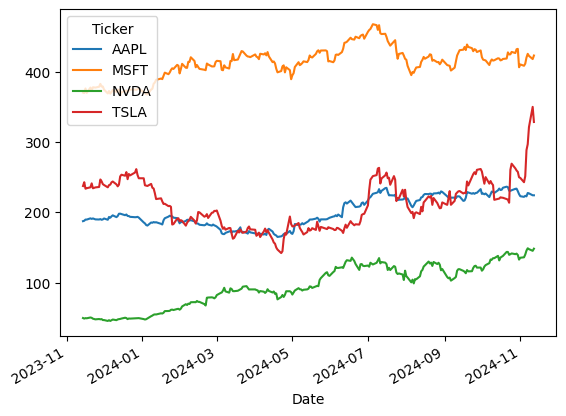

In [9]:
Close.plot()

# Twitter Data Collection
https://www.youtube.com/watch?v=AFeXivA7Hh4

In [10]:
#following this tutorial https://www.youtube.com/watch?v=AFeXivA7Hh4
import requests
import pandas as pd


In [11]:
twitter_data = []

In [12]:
%%time
from google.colab import userdata
import requests
import pandas as pd
# Retrieve the 'twitter_api_key' secret from Colab
twitter_api_key = userdata.get('twitter_api_key')


payload = {
    'api_key': twitter_api_key,
    'query':'Stock',
    'num': '10'

}
response = requests.get(
    'https://api.scraperapi.com/structured/twitter/search', params=payload)

# Check the response status code
if response.status_code == 200:
  twitter_data = response.json()
  # Proceed with processing the JSON data
else:
  print(f"Error: Request failed with status code {response.status_code}")
  print(response.text) # Print the response content to see the error message

CPU times: user 41 ms, sys: 9.28 ms, total: 50.3 ms
Wall time: 4.4 s


In [13]:
twitter_data

{'search_information': {'query_displayed': 'site:twitter.com "Stock"'},
 'organic_results': [{'position': 0,
   'title': 'Stocktwits',
   'snippet': 'UPDATE $TSLA is down BIG today, -5.6% Stock is still up around 16% in the past week Are you buying, holding or selling?',
   'highlighs': ['Stock'],
   'link': 'https://twitter.com/stocktwits',
   'displayed_link': '1M+ followers'},
  {'position': 1,
   'title': 'MarketWatch',
   'snippet': "MicroStrategy to lose 'controlled company' exemption, and stock seesaws higher ... Stock Market Today: Dow, S&P 500 turn lower as Treasury yields rise a day\xa0...",
   'highlighs': ['stock', 'Stock'],
   'link': 'https://twitter.com/marketwatch',
   'displayed_link': '4.6M+ followers'},
  {'position': 2,
   'title': 'Brad Freeman (@StockMarketNerd) ...',
   'snippet': 'I Write Stock Market Nerd Newsletter for Readers in 173 Countries -- Subscribe ; Masters in Finance; @Umich x 2|',
   'highlighs': ['Stock'],
   'link': 'https://twitter.com/stockmarke

In [14]:
# from pprint import pprint

# print(f"The type of data is: {type(data)}")
# print("Here is the content of data:")
# pprint(data)

# Reddit Data Collection

https://www.youtube.com/watch?v=8KrUCXlAN4Q

In [15]:
!pip install praw
!pip install asyncpraw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 4.6 MB/s eta 0:00:00


In [16]:
import praw
import asyncpraw
import asyncio
from datetime import datetime, timedelta

In [17]:
from google.colab import userdata
client_id = userdata.get('client_id')
client_secret = userdata.get('client_secret')

reddit = praw.Reddit(client_id= client_id,
                     client_secret=client_secret,
                     user_agent='StockBot')

In [26]:
import pandas as pd
import re
from datetime import datetime, timedelta
top_posts = []
subreddit = reddit.subreddit('stocks')
subreddit_data = []

for post in subreddit.hot(limit=10):
    post_data = {
        "title": post.title,
        "author": str(post.author),
        "upvotes": post.score,
        "comments_count": post.num_comments,
        "url": post.url,
        "comments": []

    }

    submission = reddit.submission(id=post.id)
    submission.comments.replace_more(limit=0)

    for comment in submission.comments.list()[:10]:  # Limit to 10 comments
        post_data["comments"].append(comment.body)

    top_posts.append(post_data)
subreddit_data = top_posts

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [19]:
print(submission)

1gprv8a


In [27]:
print(top_posts)

[{'title': '/r/stocks US Election and Market Megathread', 'author': 'turkeychicken', 'upvotes': 52, 'comments_count': 361, 'url': 'https://www.reddit.com/r/stocks/comments/1gjhdg1/rstocks_us_election_and_market_megathread/', 'comments': ['Stocks go down = Are we due for a correction?\n\nStocks go up = Are we overvalued?\n\nThe market is always nervous.', "I've read so many different articles suggesting that markets will rally after we find out the results of the election, regardless of who wins, because the uncertainty goes away. Does anyone else find this difficult to comprehend? If we know for a fact that markets will go up by the end of this week, then what uncertainty is there in buying the index? Why wouldn't a guarantee of equity prices going up this week be already priced in today? They say that there's money on the sidelines waiting until election results come out to dive in - but if the victor of the election is irrelevant, why wait?", "If you're holding solar stocks...my cond

In [21]:
from pathlib import Path
import json
#print(top_posts)
path = Path('reddit_data.json')
print(path)
contents = json.dumps(top_posts, indent=4)
reddit_input = path.write_text(contents)
#print(reddit_input)
#print(contents)

reddit_data.json


In [22]:
import pprint
from pprint import pprint
pprint(subreddit_data)

[]


In [28]:
print(type(subreddit_data))
print(subreddit_data[1])
print(subreddit_data[0]['comments'])
#data saved in subreddit_data

<class 'list'>
{'title': 'r/Stocks Daily Discussion & Technicals Tuesday - Nov 12, 2024', 'author': 'AutoModerator', 'upvotes': 14, 'comments_count': 272, 'url': 'https://www.reddit.com/r/stocks/comments/1gphrmq/rstocks_daily_discussion_technicals_tuesday_nov/', 'comments': ['Shopify/$SHOP is going to have a crazy day today. Up 15% premarket on earnings release. They absolutely crushed it!\n\n"Shopify (NYSE, TSX: SHOP) reported Q3 2024 financial results, showing a 26% revenue growth to $2.162 billion and a 19% free cash flow margin. This marks the sixth consecutive quarter of over 25% revenue growth, excluding logistics. Key metrics include a GMV of $69.715 billion, MRR of $175 million, gross profit of $1.118 billion, and operating income of $283 million. Free cash flow grew to $421 million. President Harley Finkelstein emphasized Shopify\'s role in supporting merchants, while CFO Jeff Hoffmeister highlighted the company\'s balanced approach to growth and operational leverage."', 'Abso

# Data preproccessing

In [30]:
print(twitter_data)

{'search_information': {'query_displayed': 'site:twitter.com "Stock"'}, 'organic_results': [{'position': 0, 'title': 'Stocktwits', 'snippet': 'UPDATE $TSLA is down BIG today, -5.6% Stock is still up around 16% in the past week Are you buying, holding or selling?', 'highlighs': ['Stock'], 'link': 'https://twitter.com/stocktwits', 'displayed_link': '1M+ followers'}, {'position': 1, 'title': 'MarketWatch', 'snippet': "MicroStrategy to lose 'controlled company' exemption, and stock seesaws higher ... Stock Market Today: Dow, S&P 500 turn lower as Treasury yields rise a day\xa0...", 'highlighs': ['stock', 'Stock'], 'link': 'https://twitter.com/marketwatch', 'displayed_link': '4.6M+ followers'}, {'position': 2, 'title': 'Brad Freeman (@StockMarketNerd) ...', 'snippet': 'I Write Stock Market Nerd Newsletter for Readers in 173 Countries -- Subscribe ; Masters in Finance; @Umich x 2|', 'highlighs': ['Stock'], 'link': 'https://twitter.com/stockmarketnerd', 'displayed_link': '149.4K+ followers'},

In [29]:
print(subreddit_data)

[{'title': '/r/stocks US Election and Market Megathread', 'author': 'turkeychicken', 'upvotes': 52, 'comments_count': 361, 'url': 'https://www.reddit.com/r/stocks/comments/1gjhdg1/rstocks_us_election_and_market_megathread/', 'comments': ['Stocks go down = Are we due for a correction?\n\nStocks go up = Are we overvalued?\n\nThe market is always nervous.', "I've read so many different articles suggesting that markets will rally after we find out the results of the election, regardless of who wins, because the uncertainty goes away. Does anyone else find this difficult to comprehend? If we know for a fact that markets will go up by the end of this week, then what uncertainty is there in buying the index? Why wouldn't a guarantee of equity prices going up this week be already priced in today? They say that there's money on the sidelines waiting until election results come out to dive in - but if the victor of the election is irrelevant, why wait?", "If you're holding solar stocks...my cond

In [32]:
%%time
import pandas as pd
import re

subreddit = reddit.subreddit('stocks')
subreddit_data = []

for post in subreddit.hot(limit=2):
    post_data = {
        "id": post.id,
                "title": post.title,
        "author": str(post.author),
        "upvotes": post.score,
        "comments_count": post.num_comments,
        "url": post.url,
        "comments": []
    }

    submission = reddit.submission(id=post.id)
    submission.comments.replace_more(limit=0)

    for comment in submission.comments.list():
        post_data["comments"].append(comment.body)

    subreddit_data.append(post_data)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



CPU times: user 230 ms, sys: 3.45 ms, total: 233 ms
Wall time: 4.99 s


In [34]:
subreddit_data

[{'id': '1gjhdg1',
  'title': '/r/stocks US Election and Market Megathread',
  'author': 'turkeychicken',
  'upvotes': 56,
  'comments_count': 361,
  'url': 'https://www.reddit.com/r/stocks/comments/1gjhdg1/rstocks_us_election_and_market_megathread/',
  'comments': ['Stocks go down = Are we due for a correction?\n\nStocks go up = Are we overvalued?\n\nThe market is always nervous.',
   "I've read so many different articles suggesting that markets will rally after we find out the results of the election, regardless of who wins, because the uncertainty goes away. Does anyone else find this difficult to comprehend? If we know for a fact that markets will go up by the end of this week, then what uncertainty is there in buying the index? Why wouldn't a guarantee of equity prices going up this week be already priced in today? They say that there's money on the sidelines waiting until election results come out to dive in - but if the victor of the election is irrelevant, why wait?",
   "If yo

In [36]:
import pandas as pd
import re

def preprocess_text(text):
  """Preprocesses text data by removing URLs, mentions, hashtags, and special characters."""
  # Remove URLs
  text = re.sub(r'http\S+', '', text)
  # Remove mentions (@username)
  text = re.sub(r'@\w+', '', text)
  # Remove hashtags (#hashtag)
  text = re.sub(r'#\w+', '', text)
  # Remove special characters and numbers
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  # Convert to lowercase
  text = text.lower()
  return text

def process_data(data):    #twitter data needs this function
    """
    Processes the input data and returns a list of preprocessed text.
    """
    preprocessed_data = [] # Initialize an empty list to store preprocessed data
    if data is None:
        print("No data provided.")
    elif isinstance(data, dict) and 'organic_results' in data and isinstance(data['organic_results'], list):
        # Process the list of organic results
        for result in data['organic_results']:
            #print(result)
            # Access the 'snippet' key of the current result dictionary
            preprocessed_data.append(preprocess_text(result['snippet']))
    else:
        print("Data is not in the expected format.")
    return preprocessed_data # Return the preprocessed data list

# Call the function and assign the result
preprocessed_twitter_data = process_data(twitter_data)

# Call the function and assign the result
preprocessed_twitter_data = process_data(twitter_data)

# Example usage with Reddit data:
preprocessed_reddit_comments = []
preprocessed_reddit_titles = [preprocess_text(post['title']) for post in subreddit_data]

for post in subreddit_data:
    submission = reddit.submission(id=post['id'])
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        preprocessed_reddit_comments.append(preprocess_text(comment.body))

# preprocessed_reddit_titles
# preprocessed_reddit_comments
# preprocessed_twitter_data
#pprint(preprocessed_twitter_data)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [37]:
print(preprocessed_twitter_data)

['update tsla is down big today  stock is still up around  in the past week are you buying holding or selling', 'microstrategy to lose controlled company exemption and stock seesaws higher  stock market today dow sp  turn lower as treasury yields rise a day\xa0', 'i write stock market nerd newsletter for readers in  countries  subscribe  masters in finance  x ', 'stock market scientists posts  more traders turned investors in the last  weeks vs the last  months high pe stocks have a potential to make you\xa0', 'stock futures are little changed as investors look toward key inflation report live updates ', 'free stock market news that is fast accurate consistent and reliable  not just stock news  my daily stock market recap is the link in my bio', 'tesla stock is up  in a week and all of a sudden nobody is complaining  stock talk reposted  square profile picture stock talk', 'the stock market is not some video game to play here you put your hard earned money so think study evaluate befor

In [38]:
print(preprocessed_reddit_titles)
print(preprocessed_reddit_comments)

['rstocks us election and market megathread', 'rstocks daily discussion  technicals tuesday  nov  ']
['stocks go down  are we due for a correction\n\nstocks go up  are we overvalued\n\nthe market is always nervous', 'ive read so many different articles suggesting that markets will rally after we find out the results of the election regardless of who wins because the uncertainty goes away does anyone else find this difficult to comprehend if we know for a fact that markets will go up by the end of this week then what uncertainty is there in buying the index why wouldnt a guarantee of equity prices going up this week be already priced in today they say that theres money on the sidelines waiting until election results come out to dive in  but if the victor of the election is irrelevant why wait', 'if youre holding solar stocksmy condolences', 'the good news for all you people is that today i sold everything so prepare for the biggest bull run in history', 'calls on googl they crushed earn

# RabbitMQ

How to procede?
Preprocess the data and EDA:


In [39]:

data = preprocessed_twitter_data
if isinstance(data, list) and len(data) > 0:  # Check if data is in the expected format
    for tweet in data:
        preprocessed_twitter_data.append(preprocess_text(tweet['text']))
    data
elif isinstance(data, dict) and 'results' in data and isinstance(data['results'], list): #handle different response structures
    for tweet in data['results']:
        if 'text' in tweet:  # check for the 'text' key
            preprocessed_twitter_data.append(preprocess_text(tweet['text']))
    data
else:
    print("Unexpected format of Twitter data.")


TypeError: string indices must be integers

In [50]:
!pip install pika

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 5.7 MB/s eta 0:00:00


In [55]:
import pika

In [56]:
class RabbitMQConnection:
    """Singleton class to manage RabbitMQ connection."""

    _instance = None

    def __new__(
        cls, host: str = None, port: int = None, username: str = None, password: str = None, virtual_host: str = "/"
    ):
        if not cls._instance:
            cls._instance = super().__new__(cls)
        return cls._instance

    def __init__(
        self,
        host: str = None,
        port: int = None,
        username: str = None,
        password: str = None,
        virtual_host: str = "/",
        fail_silently: bool = False,
        **kwargs,
    ):
        self.host = host or settings.RABBITMQ_HOST
        self.port = port or settings.RABBITMQ_PORT
        self.username = username or settings.RABBITMQ_DEFAULT_USERNAME
        self.password = password or settings.RABBITMQ_DEFAULT_PASSWORD
        self.virtual_host = virtual_host
        self.fail_silently = fail_silently
        self._connection = None

    def __enter__(self):
        self.connect()
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.close()

    def connect(self):
        try:
            credentials = pika.PlainCredentials(self.username, self.password)
            self._connection = pika.BlockingConnection(
                pika.ConnectionParameters(
                    host=self.host, port=self.port, virtual_host=self.virtual_host, credentials=credentials
                )
            )
        except pika.exceptions.AMQPConnectionError as e:
            print("Failed to connect to RabbitMQ:", e)
            if not self.fail_silently:
                raise e

    def is_connected(self) -> bool:
        return self._connection is not None and self._connection.is_open

    def get_channel(self):
        if self.is_connected():
            return self._connection.channel()

    def close(self):
        if self.is_connected():
            self._connection.close()
            self._connection = None
            print("Closed RabbitMQ connection")

In [57]:
def publish_to_rabbitmq(queue_name: str, data: str):
    """Publish data to a RabbitMQ queue."""
    try:
        # Create an instance of RabbitMQConnection
        rabbitmq_conn = RabbitMQConnection()

        # Establish connection
        with rabbitmq_conn:
            channel = rabbitmq_conn.get_channel()

            # Ensure the queue exists
            channel.queue_declare(queue=queue_name, durable=True)

            # Delivery confirmation
            channel.confirm_delivery()

            # Send data to the queue
            channel.basic_publish(
                exchange="",
                routing_key=queue_name,
                body=data,
                properties=pika.BasicProperties(
                    delivery_mode=2,  # make message persistent
                ),
            )
            print("Sent data to RabbitMQ:", data)
    except pika.exceptions.UnroutableError:
        print("Message could not be routed")
    except Exception as e:
        print(f"Error publishing to RabbitMQ: {e}")

In [58]:

from datetime import datetime
params = {"date":datetime.now , "subreddit": 'stocks' }
#other possible params T
def collect(params):
  response = requests.get('https://api.scraperapi.com/structured/twitter/search', params=payload)
  data=response.json()#dict(dict) {“organic_data”: []}

def collect(params):
    response = requests.get('https://api.scraperapi.com/structured/twitter/search', params=payload)
    data = response.json()

    # Iterate through each tweet in the 'organic_results' list
    for tweet in data["organic_results"]:
        Text = tweet['snippet']
        processed_text = preprocess_text(Text)  # Process the tweet text
        pubish_to_rabbitmq(Trading_que, processed_text)

In [59]:
publish_to_rabbitmq('Trading_que',preprocessed_twitter_data)

Error publishing to RabbitMQ: name 'settings' is not defined
